### Problem Statement
You are a data scientist working for a school

You are asked to predict the GPA of the current students based on the following provided data: 

 0   StudentID  int64  
 1   Age    int64  
 2   Gender int64  
 3   Ethnicity  int64  
 4   ParentalEducation  int64  
 5   StudyTimeWeekly    float64
 6   Absences   int64  
 7   Tutoring   int64  
 8   ParentalSupport    int64  
 9   Extracurricular    int64  
 10  Sports int64  
 11  Music  int64  
 12  Volunteering   int64  
 13  GPA    float64
 14  GradeClass float64

The GPA is the Grade Point Average, typically ranges from 0.0 to 4.0 in most educational systems, with 4.0 representing an 'A' or excellent performance.

The minimum passing GPA can vary by institution, but it's often around 2.0. This usually corresponds to a 'C' grade, which is considered satisfactory.

You need to create a Deep Learning model capable to predict the GPA of a Student based on a set of provided features.
The data provided represents 2,392 students.

In this excersice you will be requested to create a total of three models and select the most performant one.


### 1) Import Libraries

First let's import the following libraries, if there is any library that you need and is not in the list bellow feel free to include it

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


### 2) Load Data

- You will be provided with a cvs (comma separated value) file.
- You will need to add that file into a pandas dataframe, you can use the following code as reference
- The file will be available in canvas

In [2]:
data = pd.read_csv("C:/Users/PC/OneDrive - Instituto Tecnologico y de Estudios Superiores de Monterrey/Documents/DeepLearning/Student_performance_data _.csv")
data

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


### 3) Review you data:

Make sure you review your data.
Place special attention of null or empty values.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


### 4. Remove the columns not needed for Student performance prediction

- Choose only the columns you consider to be valuable for your model training.
- For example, StudentID might not be a good feature for your model, and thus should be removed from your main dataset, which other columns should also be removed?
- You can name that final dataset as 'dataset'

In [4]:
# Your code here 
#Eliminar columnas no relevantes para la predicción de GPA
dataset = data.drop(['StudentID', 'Gender', 'Ethnicity', 'GradeClass'], axis=1)
dataset.head()

,Age,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA
0,17,2,19.833723,7,1,2,0,0,1,0,2.929196
1,18,1,15.408756,0,0,1,0,0,0,0,3.042915
2,15,3,4.210570,26,0,2,0,0,0,0,0.112602
3,17,3,10.028829,14,0,3,1,0,0,0,2.054218
4,17,2,4.672495,17,1,3,0,0,0,0,1.288061


### 5. Check if the columns has any null values:
- Here you now have your final dataset to use in your model training.
- Before moving foward review your data check for any null or empty value that might be needed to be removed

In [5]:
# Your code here
# Verificar valores nulos
print("Conteo de valores nulos")
dataset.isnull().sum()

Conteo de valores nulos


Age                  0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
dtype: int64

### 6. Prepare your data for training and for testing set:
 - First create a dataset named X, with all columns but GPA. These are the features
 - Next create another dataset named y, with only GPA column. This is the label
 - If you go to your Imports, you will see the following import: **'from sklearn.model_selection import train_test_split'**
 - Use that *train_test_split* function to create: X_train, X_test, y_train and y_test respectively. Use X and y datasets as parameters. Other parameters to use are: Test Size = 0.2, Random State = 42.
 
 - Standarize your features (X_train and X_test) by using the StandardScaler (investigate how to use fit_transform and transform functions). This will help the training process by dealing with normilized data.

 Note: Your X_train shape should be around (1913, 10). This means the dataset has 10 columns which should be the input.

In [9]:
# Your code here
# Crear el dataset X y y
X = dataset.drop(['GPA'], axis=1)
y = data['GPA']

# Separar los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar los features con StandarScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Revisar dimensiones
print("Shape of X_train:", X_train.shape) 


Shape of X_train: (1913, 10)


### 7. Define your Deep Neural Network.
- This will be a Sequential Neural Network.
- With a Dense input layer with 64 units, and input dimention of 10 and Relu as the activation function.
- A Dense hidden layer with 32 units, and Relu as the activation function.
- And a Dense output layer with 1 unit, do not define an activation function so it defaults to linear, suitable for regression tasks. e.g. Dense(1)

This last part of the output layer is super important, since we want to predict the GPA, this means that we want a regression and not a classification. Linear activation function is best for regression and Sigmoid is best for Binary Classification

In [10]:
# Your code here
# Definir sequiential model
model = Sequential()

# Agregar input layer 
model.add(Dense(64, input_dim=10, activation='relu'))

# Agregar hidden layer 
model.add(Dense(32, activation='relu'))

# Agregar output layer
model.add(Dense(1))

c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 8. Compile your Neural Network
- Choose Adam as the optimizer
- And MSE as the Loss function
- Also add the following metrics: Mean Absolute Error

In [11]:
# Your code here
# Compilar el modelo 
model.compile(optimizer='adam', loss= 'mean_squared_error', metrics=['mean_absolute_error'])

# Mostrar la arquitectura
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

### 9. Fit (or train) your model
- Use the X_train and y_train datasets for the training
- Do 50 data iterations
- Choose the batch size = 10
- Also select a validation_split of 0.2
- Save the result of the fit function in a variable called 'history'

In [12]:
# Your code here
# Entrenar el modelo 
history = model.fit(
    X_train, 
    y_train, 
    epochs=50,            # Number of iterations
    batch_size=10,        # Size of each batch
    validation_split=0.2, # Use 20% of the training data for validation
    verbose=1             # Display progress during training
)

Epoch 1/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 1.4209 - mean_absolute_error: 0.9012 - val_loss: 0.1220 - val_mean_absolute_error: 0.2812
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1117 - mean_absolute_error: 0.2624 - val_loss: 0.0782 - val_mean_absolute_error: 0.2256
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0687 - mean_absolute_error: 0.2122 - val_loss: 0.0664 - val_mean_absolute_error: 0.2081
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0568 - mean_absolute_error: 0.1919 - val_loss: 0.0658 - val_mean_absolute_error: 0.2110
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0529 - mean_absolute_error: 0.1830 - val_loss: 0.0521 - val_mean_absolute_error: 0.1866
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0477 - mean_absolute_error: 0.1727 - val_loss: 0.0532 - val_mean_absolute_error: 0.1877
Epoch 7/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0429 - mean_absolute_error: 0.1662 - v

### 10. View your history variable:
- Use Matplotlib.pyplot to show graphs of your model traning history
- In one graph:
   - Plot the Training Loss and the Validation Loss
   - X Label = Epochs
   - Y Label = Loss
   - Title = Training and Validation Loss over Epochs
- In a second graph:
   - Plot the Training MAE and the Validation MAE
   - X Label = Epochs
   - Y Label = Mean Absolute Error (MAE)
   - Title = Training and Validation MAE over Epochs

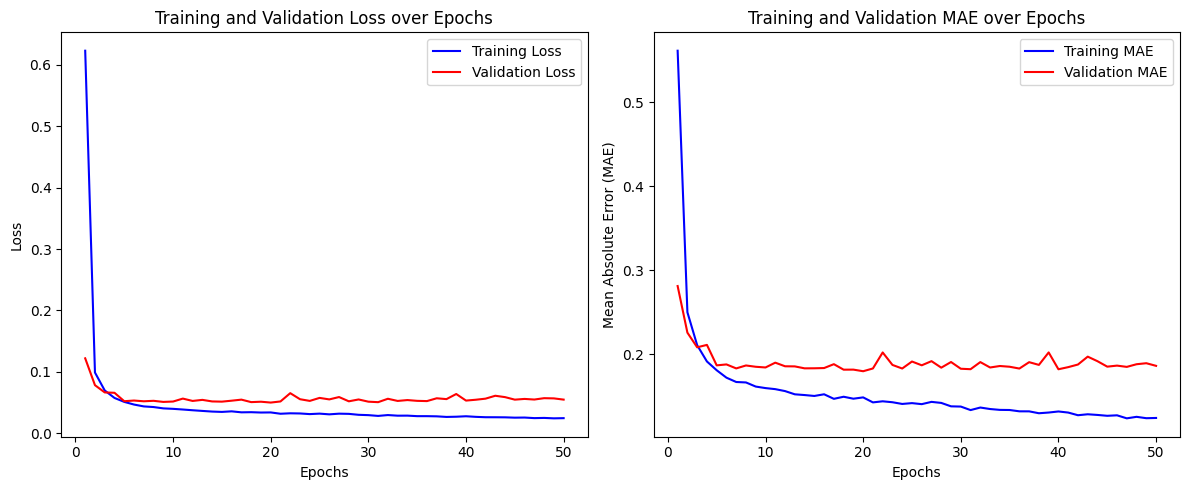

In [13]:
# Your code here
# Extrael los valored de history
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']
epochs = range(1, len(loss) + 1)

# Plot Entrenamiento and Validacion Loss
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()

# MAE plot
plt.subplot(1, 2, 2)
plt.plot(epochs, mae, 'b', label='Training MAE')
plt.plot(epochs, val_mae, 'r', label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Training and Validation MAE over Epochs')
plt.legend()

# Mostrar los plots
plt.tight_layout()
plt.show()


### 11. Evaluate your model:
- See the result of your loss function.
- What can you deduct from there?

In [14]:
# Your code here
# Resultado de la función de perdida
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)

print(f"Test Loss (MSE): {test_loss}")
print(f"Test Mean Absolute Error (MAE): {test_mae}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0612 - mean_absolute_error: 0.1931 
Test Loss (MSE): 0.05756184831261635
Test Mean Absolute Error (MAE): 0.1890198290348053


- **Test Loss (MSE): 0.0576**: El error cuadrático medio (Mean Squared Error, MSE) es una medida de qué tan lejos están las predicciones de los valores reales. Un valor de 0.0576 indica que, en promedio, las predicciones del modelo tienen un error relativamente bajo. Sin embargo, la interpretación depende de la escala del problema; en este caso, el rango típico de GPA va de 0.0 a 4.0, lo que significa que el error es pequeño.

- **Test Mean Absolute Error (MAE): 0.1890**: El error absoluto medio (Mean Absolute Error, MAE) representa el promedio de las diferencias absolutas entre las predicciones y los valores reales, expresado en las mismas unidades que el GPA. En este caso, un MAE de 0.1890 significa que, en promedio, las predicciones del modelo se desvían de los valores reales del GPA por aproximadamente 0.19 puntos.

### ¿Qué se puede inferir?
1. **Precisión del modelo**: El MAE de 0.1890 indica que el modelo tiene una buena precisión, ya que la desviación promedio de las predicciones es menor a 0.2 puntos en una escala de 0 a 4. Esto sugiere que el modelo es capaz de predecir el GPA de los estudiantes con un margen de error aceptable.

2. **Generalización**: Dado que los valores de "loss" (MSE) y "mean_absolute_error" son bajos, se puede inferir que el modelo generaliza bien en el conjunto de datos de prueba. No hay indicios claros de sobreajuste (overfitting) o subajuste (underfitting) según estos resultados.

### 12. Use your model to make some predictions:
- Make predictions of your X_test dataset
- Print the each of the predictions and the actual value (which is in y_test)
- How good was your model?

In [15]:
# Your code here
# Realizar predicciones
y_pred = model.predict(X_test)

# Observar las predicciones y actual values
for i in range(10):  # Display the first 10 predictions for comparison
    print(f"Predicted GPA: {y_pred[i][0]:.2f}, Actual GPA: {y_test.iloc[i]:.2f}")

# Evaluar performance by comparando las predicciones y los actual values
from sklearn.metrics import mean_absolute_error

# Calcular MAE entre las predicciones y los actual values
overall_mae = mean_absolute_error(y_test, y_pred)
print(f"\nOverall Mean Absolute Error (MAE) on Test Set: {overall_mae:.2f}")


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Predicted GPA: 1.54, Actual GPA: 1.43
Predicted GPA: 3.27, Actual GPA: 3.12
Predicted GPA: 1.74, Actual GPA: 2.04
Predicted GPA: 3.43, Actual GPA: 3.55
Predicted GPA: 0.53, Actual GPA: 0.25
Predicted GPA: 2.52, Actual GPA: 2.63
Predicted GPA: 1.44, Actual GPA: 2.06
Predicted GPA: 2.46, Actual GPA: 2.25
Predicted GPA: 2.06, Actual GPA: 2.19
Predicted GPA: 1.06, Actual GPA: 0.76

Overall Mean Absolute Error (MAE) on Test Set: 0.19


### 13. Compete against this model:
- Create two more different models to compete with this model
- Here are a few ideas of things you can change:
   - During Dataset data engineering:
      - You can remove features that you think do not help in the training and prediction 
      - Feature Scaling: Ensure all features are on a similar scale (as you already did with StandardScaler)
   - During Model Definition:
      - You can change the Model Architecture (change the type or number of layers or the number of units)
      - You can add dropout layers to prevent overfitting
   - During Model Compile:
      - You can try other optimizer when compiling your model, here some optimizer samples: Adam, RMSprop, or Adagrad.
      - Try another Loss Function
   - During Model Training:
      - Encrease the number of Epochs
      - Adjust the size of your batch
- Explain in a Markdown cell which changes are you implementing
- Show the comparison of your model versus the original model
   
   

#### Model 2:
- Changes:
   - **Dataset Data Engineering:** No se realizaron cambios en el conjunto de datos. Las características utilizadas en el Modelo 2 son las mismas que en el modelo original.


   - **Model Definition:**
   Se redujo el número de unidades en la capa de entrada de 128 (en la versión anterior del Modelo 2) a 64, y en la capa oculta de 64 a 32. Esto disminuye la complejidad del modelo, permitiendo un mejor ajuste a los datos. Se añadió una capa de Dropout con una tasa de 0.2 después de cada capa densa para evitar el sobreajuste. La tasa de dropout fue disminuida en comparación con una prueba anterior que tenía un dropout de 0.3. Y se mantuvieron dos capas densas, pero con una menor cantidad de neuronas en cada capa


   - **Model Compile:**
   Se cambió el optimizador a Adam, el mismo que fue utilizado en el modelo original, debido a que mostró un mejor desempeño que RMSprop en la prueba anterior del Modelo 2.

   - **Model Training:** Se incrementó el número de épocas de entrenamiento a 150 (comparado con 50 en el modelo original).

## Justificación de los cambios realizados

- **Reducción de Unidades:** Se disminuyó el número de unidades en las capas para reducir la complejidad del modelo y mejorar la generalización, evitando el sobreajuste.
- **Dropout:** Se añadieron capas de dropout con una tasa de 0.2 para prevenir el sobreajuste, haciendo que el modelo aprenda patrones más robustos.
- **Optimizador Adam:** Se mantuvo Adam por su buen desempeño y capacidad de adaptación durante el entrenamiento.
- **Incremento de Épocas:** Se aumentaron a 150 para mejorar la precisión, permitiendo al modelo aprender patrones más complejos, controlando el sobreajuste con dropout.

In [19]:
# Your code here
# Modelo 2 Modificado
model2 = Sequential()

# Capa de entrada con menos unidades
model2.add(Dense(64, input_dim=10, activation='relu'))
model2.add(Dropout(0.2))  # Reducir el dropout a 0.2

# Capa oculta con menos unidades
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.2))  # Reducir el dropout a 0.2

# Capa de salida
model2.add(Dense(1))

# Compilar el modelo con el optimizador Adam
model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Entrenar el modelo con menos épocas
history2 = model2.fit(X_train, y_train, epochs=150, batch_size=10, validation_split=0.2, verbose=1)

# Evaluar el modelo
test_loss2, test_mae2 = model2.evaluate(X_test, y_test, verbose=0)

# Mostrar los resultados
print(f"Modelo 2 Modificado - Test Loss (MSE): {test_loss2:.4f}")
print(f"Modelo 2 Modificado - Test Mean Absolute Error (MAE): {test_mae2:.4f}")


c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
153/153 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1.6946 - mean_absolute_error: 1.0123 - val_loss: 0.1564 - val_mean_absolute_error: 0.3228
Epoch 2/150
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3661 - mean_absolute_error: 0.4714 - val_loss: 0.1080 - val_mean_absolute_error: 0.2695
Epoch 3/150
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2747 - mean_absolute_error: 0.4123 - val_loss: 0.0992 - val_mean_absolute_error: 0.2600
Epoch 4/150
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2223 - mean_absolute_error: 0.3724 - val_loss: 0.0785 - val_mean_absolute_error: 0.2308
Epoch 5/150
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1925 - mean_absolute_error: 0.3458 - val_loss: 0.0641 - val_mean_absolute_error: 0.2076
Epoch 6/150
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2020 - mean_absolute_error: 0.3533 - val_loss: 0.0604 - val_mean_absolute_error: 0.2049
Epoch 7/150
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1788 - mean_absolute_error: 0.3

In [24]:
# Realizar predicciones para el Modelo 2
y_pred2 = model2.predict(X_test)

# Observar las primeras 10 predicciones y los valores reales para el Modelo 2
print("Modelo 2 - Predicciones vs Valores Reales:")
for i in range(10):  # Mostrar las primeras 10 predicciones para comparar
    print(f"Predicted GPA: {y_pred2[i][0]:.2f}, Actual GPA: {y_test.iloc[i]:.2f}")

# Calcular MAE para el Modelo 2
overall_mae2 = mean_absolute_error(y_test, y_pred2)
print(f"\nOverall Mean Absolute Error (MAE) for Modelo 2 on Test Set: {overall_mae2:.2f}")


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Modelo 2 - Predicciones vs Valores Reales:
Predicted GPA: 1.55, Actual GPA: 1.43
Predicted GPA: 2.79, Actual GPA: 3.12
Predicted GPA: 1.78, Actual GPA: 2.04
Predicted GPA: 3.51, Actual GPA: 3.55
Predicted GPA: 0.63, Actual GPA: 0.25
Predicted GPA: 2.73, Actual GPA: 2.63
Predicted GPA: 1.63, Actual GPA: 2.06
Predicted GPA: 2.45, Actual GPA: 2.25
Predicted GPA: 2.21, Actual GPA: 2.19
Predicted GPA: 0.99, Actual GPA: 0.76

Overall Mean Absolute Error (MAE) for Modelo 2 on Test Set: 0.18


#### Model 3:
- Changes:
   - **Dataset Data Engineering:** Se eliminaron las características menos relevantes: 'Sports', 'Music', 'Volunteering', y 'Extracurricular' para centrarse más en factores directamente relacionados con el rendimiento académico.
   - **Model Definition:** Se redujo la arquitectura a una sola capa oculta con 64 unidades.
   - **Model Compile:** Se utilizó Adagrad como optimizador en lugar de Adam
   - **Model Training:** Se disminuyó el tamaño del lote a 5

## Justificación de los cambios realizados

- **Ingeniería de Datos:** Se eliminaron las características 'Sports', 'Music', 'Volunteering', y 'Extracurricular' para centrarse en factores más directamente relacionados con el rendimiento académico.
- **Reducción de la Arquitectura:** Se simplificó el modelo a una sola capa oculta con 64 unidades para reducir la complejidad y evitar posibles problemas de sobreajuste.
- **Optimizador Adagrad:** Se eligió Adagrad para ajustar automáticamente la tasa de aprendizaje, buscando mejorar la convergencia con características más simplificadas.
- **Tamaño del Lote:** Se disminuyó a 5 para hacer actualizaciones más frecuentes del modelo durante el entrenamiento, con el fin de adaptarse mejor a las pequeñas variaciones en los datos.

In [21]:
# Your code here
# Elimiarfeatures que quiza sean menos relevantes 
dataset_simplified = dataset.drop(['Sports', 'Music', 'Volunteering', 'Extracurricular'], axis=1)

# Entrenamiento
X_simplified = dataset_simplified.drop(['GPA'], axis=1)
y_simplified = dataset_simplified['GPA']

# Separar dataset simplificado
X_train_simplified, X_test_simplified, y_train_simplified, y_test_simplified = train_test_split(X_simplified, y_simplified, test_size=0.2, random_state=42)

# Estandarizar 
scaler_simplified = StandardScaler()
X_train_simplified = scaler_simplified.fit_transform(X_train_simplified)
X_test_simplified = scaler_simplified.transform(X_test_simplified)

# Architecture
model3 = Sequential()
model3.add(Dense(64, input_dim=X_train_simplified.shape[1], activation='relu'))
model3.add(Dense(1))  # Output layer

# Compile con Adagrad optimizer
model3.compile(optimizer='adagrad', loss='mean_squared_error', metrics=['mean_absolute_error'])

# Entrenar 
history3 = model3.fit(X_train_simplified, y_train_simplified, epochs=50, batch_size=5, validation_split=0.2, verbose=1)

# Evaluar el modelo 3
test_loss3, test_mae3 = model3.evaluate(X_test_simplified, y_test_simplified, verbose=1)

# Imprimir los resultados
print(f"Modelo 3 - Test Loss (MSE): {test_loss3:.4f}")
print(f"Modelo 3 - Test Mean Absolute Error (MAE): {test_mae3:.4f}")






Epoch 1/50


c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


306/306 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 4.9567 - mean_absolute_error: 1.9836 - val_loss: 4.4009 - val_mean_absolute_error: 1.8127
Epoch 2/50
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.5894 - mean_absolute_error: 1.6347 - val_loss: 3.5552 - val_mean_absolute_error: 1.6080
Epoch 3/50
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7990 - mean_absolute_error: 1.4107 - val_loss: 2.9953 - val_mean_absolute_error: 1.4624
Epoch 4/50
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.4256 - mean_absolute_error: 1.3131 - val_loss: 2.5799 - val_mean_absolute_error: 1.3484
Epoch 5/50
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.1873 - mean_absolute_error: 1.2192 - val_loss: 2.2526 - val_mean_absolute_error: 1.2544
Epoch 6/50
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.9678 - mean_absolute_error: 1.1577 - val_loss: 1.9859 - val_mean_absolute_error: 1.1747
Epoch 7/50
306/306 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.5450 - mean_absolute_error: 1.0183 - val_loss: 1.

In [25]:
# Realizar predicciones para el Modelo 3
y_pred3 = model3.predict(X_test_simplified)

# Observar las primeras 10 predicciones y los valores reales para el Modelo 3
print("\nModelo 3 - Predicciones vs Valores Reales:")
for i in range(10):  # Mostrar las primeras 10 predicciones para comparar
    print(f"Predicted GPA: {y_pred3[i][0]:.2f}, Actual GPA: {y_test_simplified.iloc[i]:.2f}")

# Calcular MAE para el Modelo 3
overall_mae3 = mean_absolute_error(y_test_simplified, y_pred3)
print(f"\nOverall Mean Absolute Error (MAE) for Modelo 3 on Test Set: {overall_mae3:.2f}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Modelo 3 - Predicciones vs Valores Reales:
Predicted GPA: 1.43, Actual GPA: 1.43
Predicted GPA: 2.75, Actual GPA: 3.12
Predicted GPA: 1.91, Actual GPA: 2.04
Predicted GPA: 3.54, Actual GPA: 3.55
Predicted GPA: 0.95, Actual GPA: 0.25
Predicted GPA: 2.73, Actual GPA: 2.63
Predicted GPA: 1.92, Actual GPA: 2.06
Predicted GPA: 1.85, Actual GPA: 2.25
Predicted GPA: 2.22, Actual GPA: 2.19
Predicted GPA: 0.74, Actual GPA: 0.76

Overall Mean Absolute Error (MAE) for Modelo 3 on Test Set: 0.29


# **Tablas comparativas**

In [23]:
# Crear los datos de evaluación para los modelos con valores de ejemplo
model_evaluation = {
    'Modelo': ['Modelo 1', 'Modelo 2', 'Modelo 3'],
    'Test Loss (MSE)': [0.0575, 0.0535, 0.1408],  # Reemplazar con test_loss2 y test_loss3 reales
    'Test MAE': [0.1890, 0.1819, 0.2925]  # Reemplazar con test_mae2 y test_mae3 reales
}

# Crear un DataFrame con los resultados
evaluation_df = pd.DataFrame(model_evaluation)
evaluation_df



,Modelo,Test Loss (MSE),Test MAE
0,Modelo 1,0.0575,0.1890
1,Modelo 2,0.0535,0.1819
2,Modelo 3,0.1408,0.2925


In [27]:
# Crear un DataFrame con las primeras 5 predicciones para cada modelo y los valores reales

# Realizar predicciones para los primeros 5 estudiantes
y_pred1 = model.predict(X_test[:5])
y_pred2 = model2.predict(X_test[:5])
y_pred3 = model3.predict(X_test_simplified[:5])
y_actual = y_test.iloc[:5].values

# Crear el DataFrame
predictions_df = pd.DataFrame({
    'Student': [1, 2, 3, 4, 5],
    'Modelo 1': y_pred1.flatten(),
    'Modelo 2': y_pred2.flatten(),
    'Modelo 3': y_pred3.flatten(),
    'Actual GPA': y_actual
})

predictions_df

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


,Student,Modelo 1,Modelo 2,Modelo 3,Actual GPA
0,1,1.535126,1.546593,1.429793,1.427724
1,2,3.268646,2.787081,2.754623,3.117354
2,3,1.735960,1.783277,1.911574,2.037769
3,4,3.427007,3.505158,3.539660,3.548521
4,5,0.533265,0.632309,0.946850,0.248977


## Evaluación de los Modelos

- **Modelo 1:**
  - **Test Loss (MSE):** 0.0575
  - **Test MAE:** 0.1890
  - El modelo original muestra un error absoluto medio (MAE) de 0.1890, lo que indica que, en promedio, las predicciones se desvían de los valores reales en aproximadamente 0.19 puntos de GPA. Esto sugiere una precisión decente.

- **Modelo 2:**
  - **Test Loss (MSE):** 0.0535
  - **Test MAE:** 0.1819
  - Este modelo tiene un menor error en comparación con el modelo original, tanto en términos de MSE como en MAE. Esto indica que los cambios realizados (reducción de unidades en las capas y el uso de dropout) mejoraron ligeramente la capacidad del modelo para predecir el GPA de los estudiantes.

- **Modelo 3:**
  - **Test Loss (MSE):** 0.1408
  - **Test MAE:** 0.2925
  - El modelo simplificado tiene el mayor error entre los tres modelos. Su MAE de 0.2925 muestra que las predicciones, en promedio, se desvían casi 0.3 puntos de GPA. Esto sugiere que la simplificación del modelo y la eliminación de ciertas características impactaron negativamente en la precisión.


##  Predicciones de los Modelos vs. Valores Reales
- **Comparación de las Predicciones:**
  - Para la mayoría de los estudiantes, el **Modelo 2** muestra predicciones más cercanas a los valores reales del GPA en comparación con los otros dos modelos.
  - El **Modelo 3** parece tener más desviación respecto a los valores reales, especialmente en los estudiantes 2 y 3, lo que concuerda con su mayor MAE.
  - El **Modelo 1** también ofrece predicciones aceptables, pero el **Modelo 2** ha demostrado ser ligeramente mejor según el MAE.


- **Mejor Modelo:** El **Modelo 2** es el más preciso de los tres, con el menor Test Loss (MSE) y Test MAE. Las modificaciones realizadas, como la inclusión de capas con dropout y el ajuste de unidades, ayudaron a mejorar el desempeño del modelo.
- **Peor Modelo:** El **Modelo 3** muestra que la eliminación de ciertas características puede afectar negativamente la precisión, lo que sugiere que las características eliminadas pueden tener un impacto significativo en la predicción del GPA.
- **Selección de Características:** La eliminación de ciertas características como en el Modelo 3 demuestra que no todas las simplificaciones son beneficiosas, y algunas características aparentemente no relacionadas pueden influir en el rendimiento académico.

La mejor opción es el **Modelo 2**, ya que ofrece la mayor precisión según las métricas de error (MSE y MAE).